In [1]:
import rasterio as rio
import rioxarray as rxr
import xarray as xr
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from rasterio.transform import xy
import seaborn as sns
import os

In [4]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [6]:
def load_monthly_data(folder_path):
    files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')])
    data_arrays = [rxr.open_rasterio(f).squeeze() for f in files]
    combined = xr.concat(data_arrays, dim='month')
    return combined
precip_path=processed_files["climate"] / "prec"
precip=load_monthly_data(precip_path)
tmax_path=processed_files["climate"] / "tmax"
tmax=load_monthly_data(tmax_path)
tmin_path=processed_files["climate"] / "tmin"
tmin=load_monthly_data(tmin_path)

In [7]:
print(precip.coords)
print(precip.shape)
print(precip.attrs)

Coordinates:
  * y            (y) float64 2kB 37.54 37.46 37.38 37.29 ... 19.13 19.04 18.96
  * x            (x) float64 2kB -8.708 -8.625 -8.542 ... 11.79 11.87 11.96
    band         int64 8B 1
    spatial_ref  int64 8B 0
(12, 224, 249)
{'AREA_OR_POINT': 'Area', '_FillValue': np.float32(nan), 'scale_factor': 1.0, 'add_offset': 0.0}


In [33]:
# Calculate missing values for precipitation and temperatures
print("Number of missing values:")
print("Precipitation:", np.isnan(precip.values).sum())
print("Maximum Temperature:", np.isnan(tmax.values).sum())
print("Minimum Temperature:", np.isnan(tmin.values).sum())

# Calculate percentage of missing values
total_cells = precip.values.size
print("\nPercentage of missing values:")
print(f"Precipitation: {(np.isnan(precip.values).sum() / total_cells * 100):.2f}%")
print(f"Maximum Temperature: {(np.isnan(tmax.values).sum() / total_cells * 100):.2f}%")
print(f"Minimum Temperature: {(np.isnan(tmin.values).sum() / total_cells * 100):.2f}%")

Number of missing values:
Precipitation: 275820
Maximum Temperature: 275820
Minimum Temperature: 275820

Percentage of missing values:
Precipitation: 41.21%
Maximum Temperature: 41.21%
Minimum Temperature: 41.21%


In [8]:
# Flatten values month by month
precip_monthly = [precip.sel(month=i).values.flatten() for i in range(12)]
tmax_monthly = [tmax.sel(month=i).values.flatten() for i in range(12)]
tmin_monthly = [tmin.sel(month=i).values.flatten() for i in range(12)]

In [31]:
precip_df = precip.to_dataframe(name='precip').reset_index()
tmax_df=tmax.to_dataframe(name='tmax').reset_index()
tmin_df=tmin.to_dataframe(name='tmin').reset_index()



### Percipitation

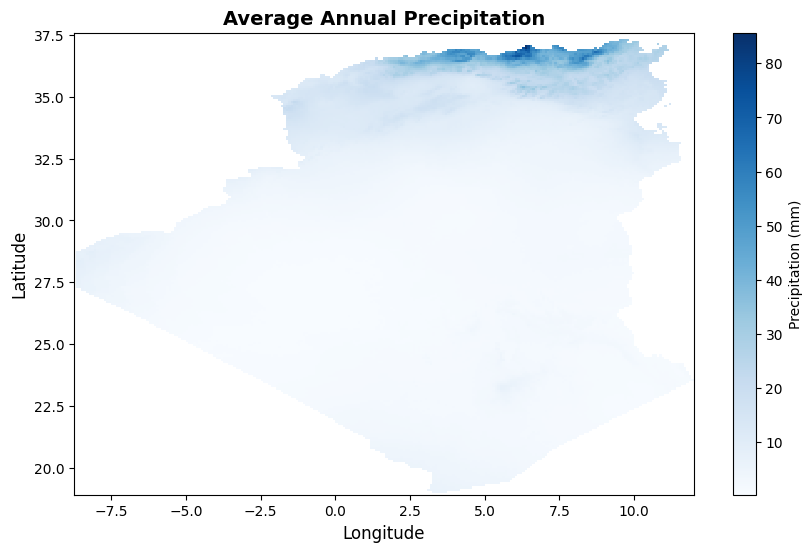

In [9]:
plt.figure(figsize=(10, 6))
avg_precip = precip.mean(dim="month")
avg_precip.plot(
    cmap="Blues",
    cbar_kwargs={"label": "Precipitation (mm)"}
)
plt.title("Average Annual Precipitation", fontsize=14, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(False)
plt.show()


In [50]:
# Calculate missing values for precipitation and temperatures
print("Number of missing values:")
print("Precipitation:", np.isnan(precip.values).sum())
print("Maximum Temperature:", np.isnan(tmax.values).sum())
print("Minimum Temperature:", np.isnan(tmin.values).sum())

# Calculate percentage of missing values
total_cells = precip.values.size
print("\nPercentage of missing values:")
print(f"Precipitation: {(np.isnan(precip.values).sum() / total_cells * 100):.2f}%")
print(f"Maximum Temperature: {(np.isnan(tmax.values).sum() / total_cells * 100):.2f}%")
print(f"Minimum Temperature: {(np.isnan(tmin.values).sum() / total_cells * 100):.2f}%")

Number of missing values:
Precipitation: 275820
Maximum Temperature: 275820
Minimum Temperature: 275820

Percentage of missing values:
Precipitation: 41.21%
Maximum Temperature: 41.21%
Minimum Temperature: 41.21%


In [10]:
import numpy as np

print("Precipitation stats:")
print("Min:", precip.min().values)
print("Max:", precip.max().values)
print("Mean:", precip.mean().values)
print("Median:", precip.median().values)
values_p=precip.values.flatten()
values_p=values_p[~np.isnan(values_p)]
mode_value_p=stats.mode(values_p, keepdims=True).mode[0]
print("Mode:", mode_value_p)
print("Std:", precip.std().values)
print("Missing values:", np.isnan(precip.values).sum())



Precipitation stats:
Min: 0.0
Max: 266.15
Mean: 5.2938075
Median: 1.7
Mode: 0.0
Std: 11.140009
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_29576\3147642890.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


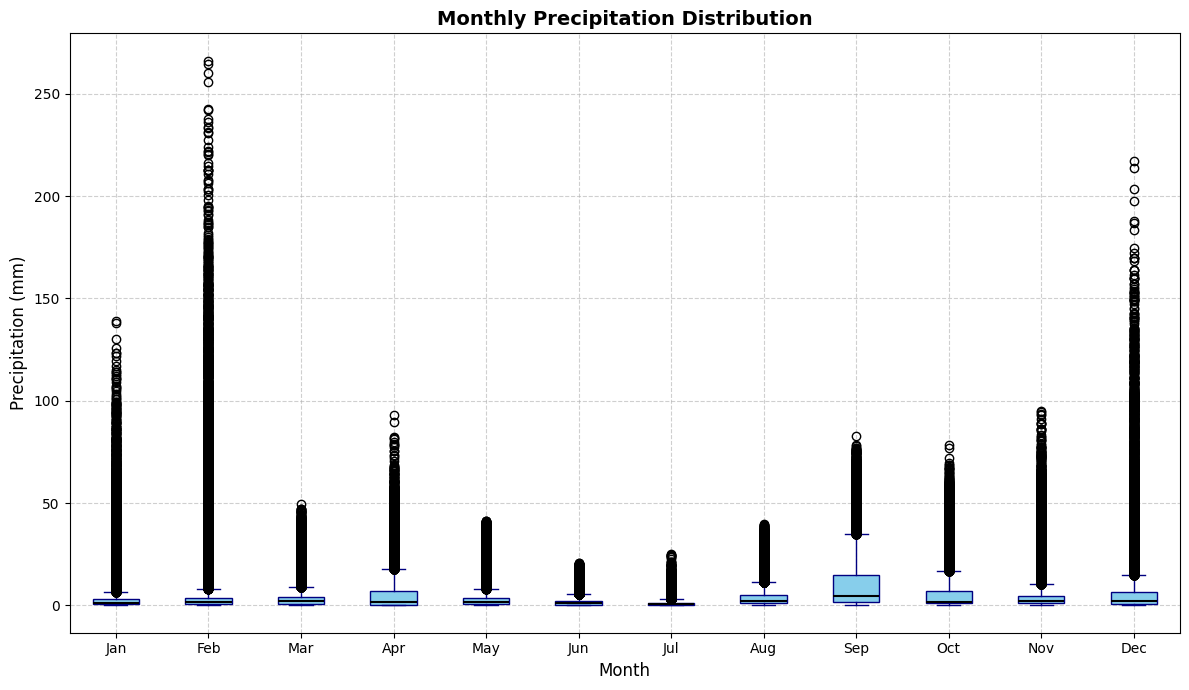

In [11]:
plt.figure(figsize=(12, 7))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in precip_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="skyblue", color="navy"),
    whiskerprops=dict(color="navy"),
    capprops=dict(color="navy")
)

plt.title("Monthly Precipitation Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


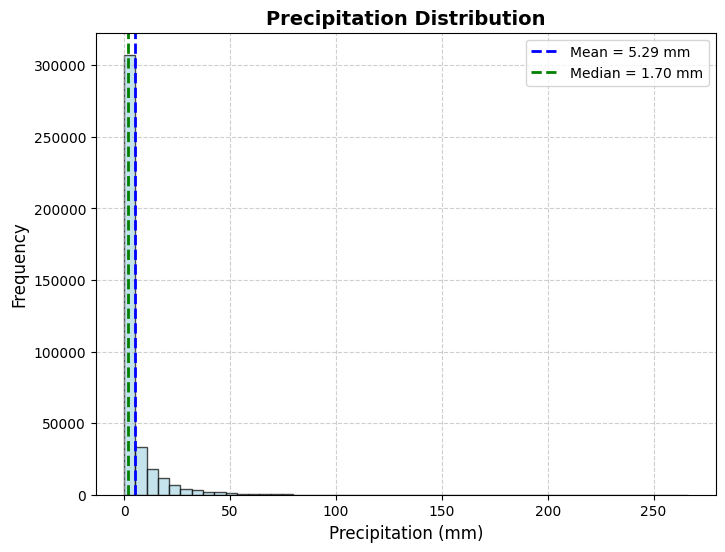

In [12]:
mean_val = precip.mean().values
median_val = precip.median().values

plt.figure(figsize=(8, 6))
precip.plot.hist(bins=50, color="lightblue", edgecolor="black", alpha=0.7)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Precipitation Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Precipitation (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Tmax

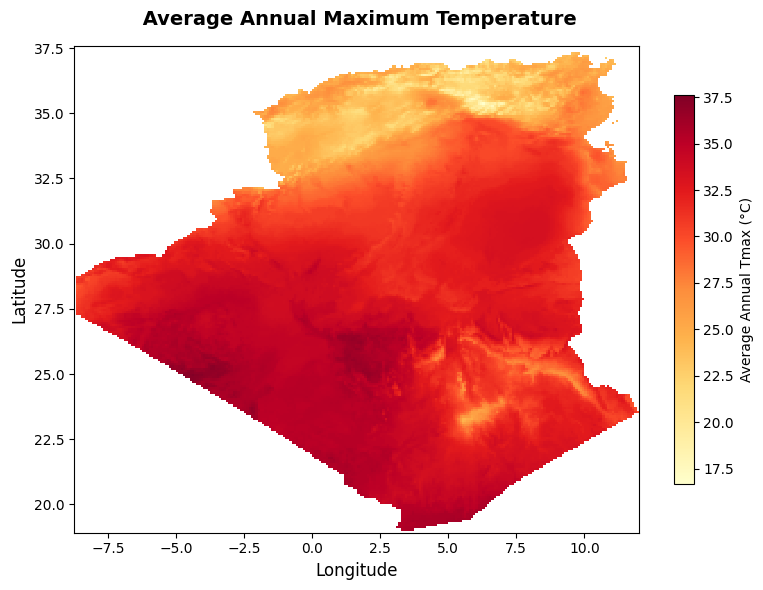

In [13]:
import matplotlib.pyplot as plt

# Compute average Tmax per year
avg_tmax = tmax.mean(dim="month")

# Create figure
plt.figure(figsize=(8, 6))

# Plot with a warm colormap
avg_tmax.plot(
    cmap="YlOrRd",  # warm colormap (yellow-orange-red)
    cbar_kwargs={
        "label": "Average Annual Tmax (°C)", 
        "shrink": 0.8
    }
)

# Add labels and title
plt.title(" Average Annual Maximum Temperature", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)



# Clean layout
plt.tight_layout()
plt.show()


In [14]:
print("\nTmax stats:")
print("Min:", tmax.min().values)
print("Max:", tmax.max().values)
print("Mean:", tmax.mean().values)
print("Median:", tmax.median().values)
values_max=tmax.values.flatten()
values_max=values_max[~np.isnan(values_max)]
mode_value_max=stats.mode(values_max, keepdims=True).mode[0]
print("Mode:", mode_value_max)
print("Std:", tmax.std().values)
print("Missing values:", np.isnan(tmax.values).sum())


Tmax stats:
Min: 5.25
Max: 48.0
Mean: 31.360682
Median: 32.0
Mode: 37.0
Std: 8.545496
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_29576\2553210429.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


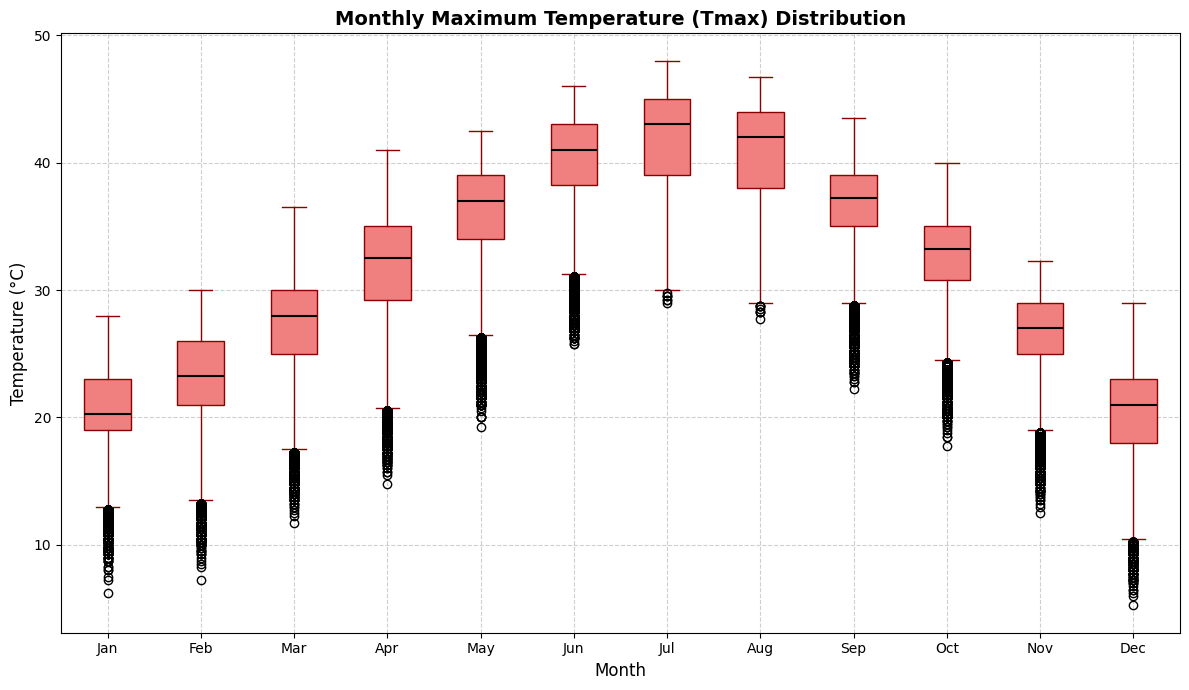

In [15]:
plt.figure(figsize=(12, 7))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in tmax_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="lightcoral", color="darkred"),
    whiskerprops=dict(color="darkred"),
    capprops=dict(color="darkred")
)

plt.title("Monthly Maximum Temperature (Tmax) Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


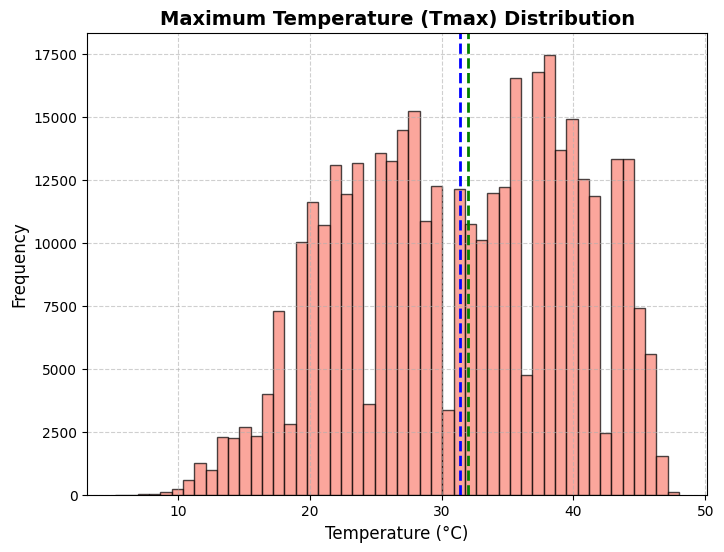

In [16]:
mean_val = tmax.mean().values
median_val = tmax.median().values
plt.figure(figsize=(8, 6))
tmax.plot.hist(
    bins=50,
    color="salmon",         # warm color for Tmax
    edgecolor="black",
    alpha=0.7
)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Maximum Temperature (Tmax) Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Tmin

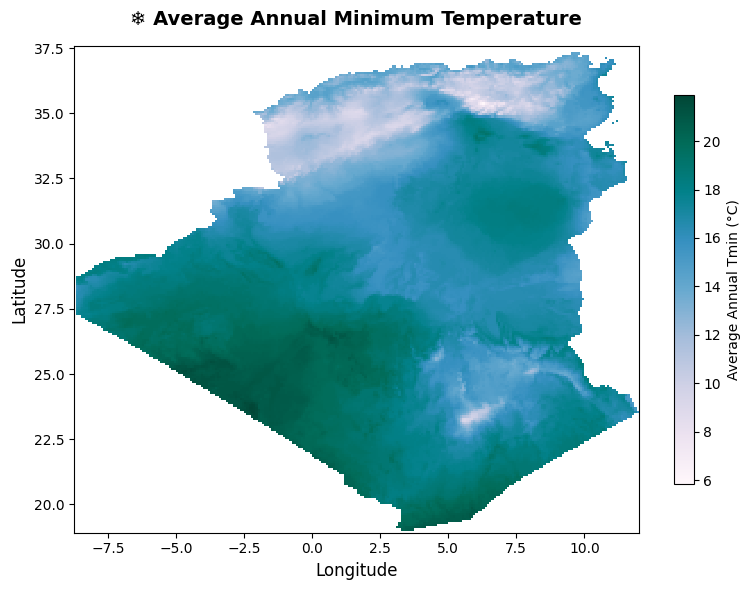

In [17]:
import matplotlib.pyplot as plt

# Compute average Tmin per year
avg_tmin = tmin.mean(dim="month")

# Create figure
plt.figure(figsize=(8, 6))

# Plot with a cool colormap
avg_tmin.plot(
    cmap="PuBuGn",  # cool tones: purple → blue → green
    cbar_kwargs={
        "label": "Average Annual Tmin (°C)",
        "shrink": 0.8
    }
)

# Add labels and title
plt.title("❄️ Average Annual Minimum Temperature", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)



# Adjust layout for beauty
plt.tight_layout()
plt.show()


In [18]:
print("\nTmin stats:")
print("Min:", tmin.min().values)
print("Max:", tmin.max().values)
print("Mean:", tmin.mean().values)
print("Median:", tmin.median().values)
values_min=tmin.values.flatten()
values_min=values_min[~np.isnan(values_min)]
mode_value_min=stats.mode(values_min, keepdims=True).mode[0]
print("Mode:", mode_value_min)
print("Std:", tmin.std().values)
print("Missing values:", np.isnan(tmin.values).sum())


Tmin stats:
Min: -2.25
Max: 32.0
Mean: 16.83729
Median: 17.0
Mode: 25.0
Std: 8.058458
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_29576\969415717.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


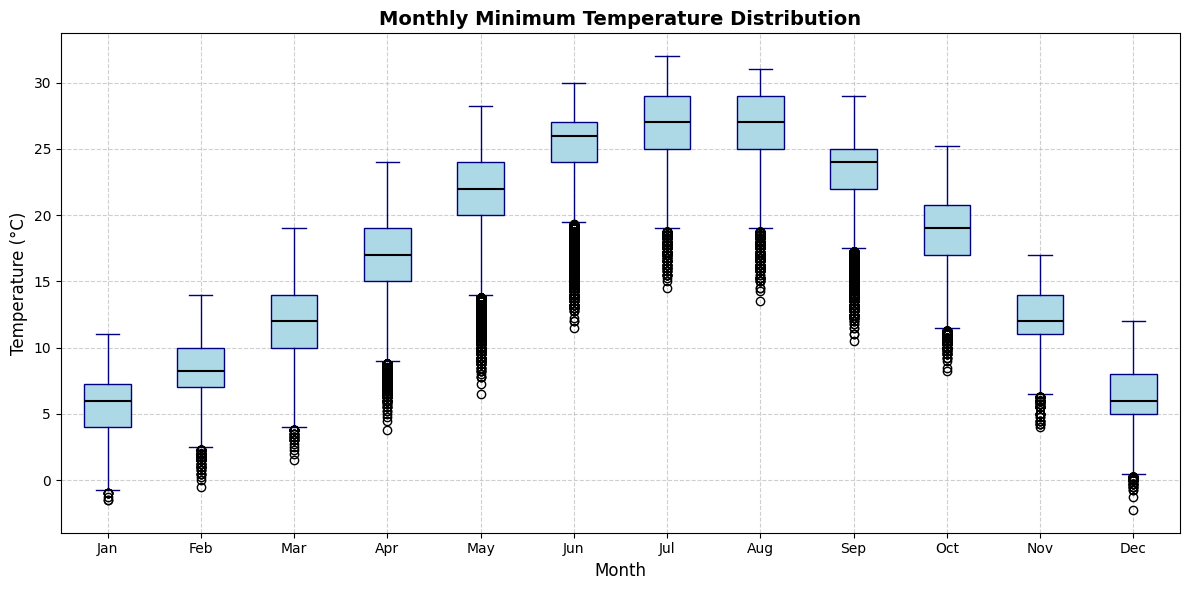

In [19]:
plt.figure(figsize=(12, 6))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in tmin_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="lightblue", color="navy"),
    whiskerprops=dict(color="navy"),
    capprops=dict(color="navy")
)

plt.title("Monthly Minimum Temperature Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


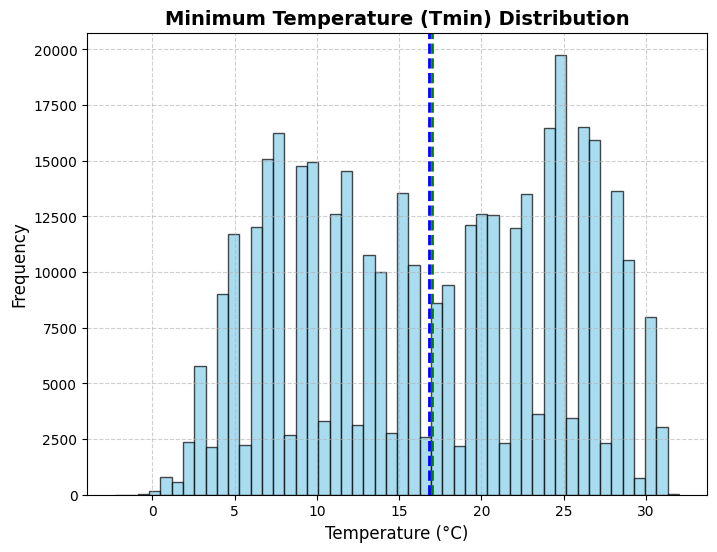

In [20]:

mean_val = tmin.mean().values
median_val = tmin.median().values
plt.figure(figsize=(8, 6))
tmin.plot.hist(
    bins=50, 
    color="skyblue", 
    edgecolor="black", 
    alpha=0.7
)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Minimum Temperature (Tmin) Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Bivariate Analysis

In [36]:
base_dir = processed_files["climate"]
climate_types = ["tmin", "tmax", "prec"]
def raster_to_df(raster_path, variable_name):
    """Convert raster (.tif) to DataFrame with lon, lat, and value columns."""
    with rio.open(raster_path) as src:
        data = src.read(1)
        mask = data != src.nodata
        rows, cols = np.where(mask)
        xs, ys = xy(src.transform, rows, cols)
        df = pd.DataFrame({
            "lon": xs,
            "lat": ys,
            variable_name: data[mask]
        })
    # Extract date from filename (assuming it contains year-month like 2020-01)
    name = os.path.basename(raster_path)
    date_part = name.split("_")[-1].replace(".tif", "")
    df["date"] = date_part
    return df

dfs = []
for ctype in climate_types:
    folder = os.path.join(base_dir, f"{ctype}")
    files = sorted([os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".tif")])
    
    for fpath in files:
        df = raster_to_df(fpath, ctype)
        dfs.append(df)


climate_df = pd.concat(dfs, ignore_index=True)

# Pivot so each variable (tmin, tmax, prec) becomes a column
climate_df = (
    climate_df
    .pivot_table(index=["lon", "lat", "date"], 
                 values=["tmin", "tmax", "prec"], 
                 aggfunc="mean")
    .reset_index()
)

 
climate_df["date"] = pd.to_datetime(climate_df["date"], format="%Y-%m")
climate_df = climate_df[climate_df["date"].dt.year == 2024]

In [26]:
print(climate_df.head())

     lon        lat       date   prec   tmax   tmin
0 -8.625  27.291667 2024-01-01  2.000  22.00   8.00
1 -8.625  27.291667 2024-02-01  0.425  25.00  11.00
2 -8.625  27.291667 2024-03-01  0.500  27.00  13.00
3 -8.625  27.291667 2024-04-01  1.500  32.00  18.00
4 -8.625  27.291667 2024-05-01  0.000  33.25  19.25


In [30]:
# Calculate missing values
print("Total number of missing values:", climate_df.isna().sum())
print("\nMissing values by column:")
print(climate_df.isna().sum())

# Calculate percentage of missing values
print("\nPercentage of missing values by column:")
print((climate_df.isna().sum() / len(climate_df) * 100).round(2), "%")

Total number of missing values: lon     0
lat     0
date    0
prec    0
tmax    0
tmin    0
dtype: int64

Missing values by column:
lon     0
lat     0
date    0
prec    0
tmax    0
tmin    0
dtype: int64

Percentage of missing values by column:
lon     0.0
lat     0.0
date    0.0
prec    0.0
tmax    0.0
tmin    0.0
dtype: float64 %


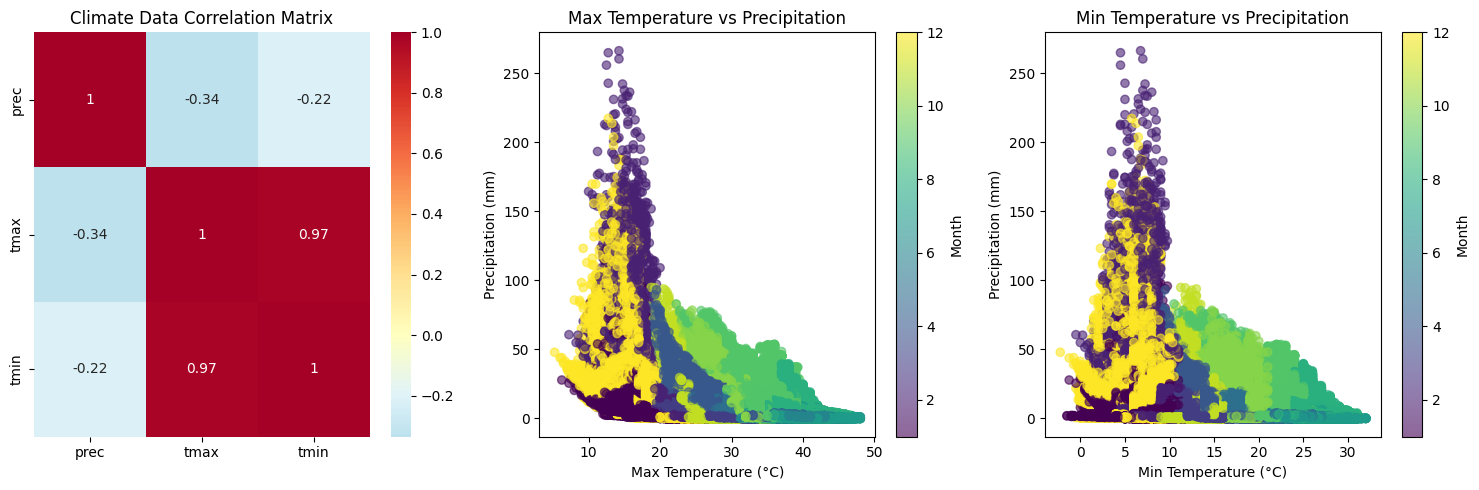

In [44]:
# Create time features
climate_df['month'] = climate_df['date'].dt.month
climate_df['day_of_year'] = climate_df['date'].dt.dayofyear

# Select numeric columns
climate_numeric = climate_df[['prec', 'tmax', 'tmin']]

# Create EDA plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 2.1 Correlation Matrix
corr_matrix = climate_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0])
axes[0].set_title('Climate Data Correlation Matrix')

# 2.3 Max Temperature vs Precipitation scatter
scatter = axes[1].scatter(climate_df['tmax'], climate_df['prec'], 
                           c=climate_df['month'], cmap='viridis', alpha=0.6)
axes[1].set_xlabel('Max Temperature (°C)')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].set_title('Max Temperature vs Precipitation')
plt.colorbar(scatter, ax=axes[1], label='Month')
# 2.4 Min Temperature vs Precipitation scatter
scatter = axes[2].scatter(climate_df['tmin'], climate_df['prec'], 
                           c=climate_df['month'], cmap='viridis', alpha=0.6)
axes[2].set_xlabel('Min Temperature (°C)')
axes[2].set_ylabel('Precipitation (mm)')
axes[2].set_title('Min Temperature vs Precipitation')
plt.colorbar(scatter, ax=axes[2], label='Month')

plt.tight_layout()
plt.show()


In [38]:
climate_df=climate_df.rename(columns={'lon':'longitude','lat':'latitude'})
climate_df.head()

,longitude,latitude,date,prec,tmax,tmin
0,-8.625,27.291667,2024-01-01,2.000,22.00,8.00
1,-8.625,27.291667,2024-02-01,0.425,25.00,11.00
2,-8.625,27.291667,2024-03-01,0.500,27.00,13.00
3,-8.625,27.291667,2024-04-01,1.500,32.00,18.00
4,-8.625,27.291667,2024-05-01,0.000,33.25,19.25


In [45]:
len(climate_df[climate_df["prec"]<0])

0

https://www.researchgate.net/publication/369072653_A_comprehensive_implementation_of_the_log_Box-Cox_and_log-sinh_transformations_for_skewed_and_censored_precipitation_data

### handling precipitation skweness
Apply a mild transformation to reduce skew (log(x+1) 1 to avoid log(0))

In [59]:
climate_df["precip_log"] = np.log(climate_df["prec"] + 1)
climate_df["precip_log"].head()
print("values greater than 0:",len(climate_df[climate_df["precip_log"]>=0]))
print("values less than 0:",len(climate_df[climate_df["precip_log"]<0]))


values greater than 0: 393492
values less than 0: 0


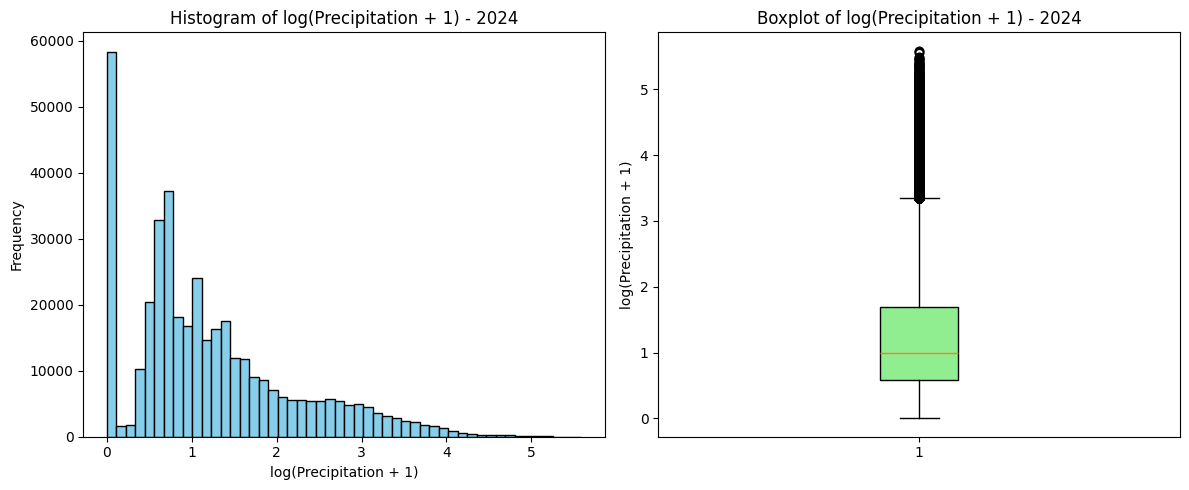

In [49]:


plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(climate_df["precip_log"], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of log(Precipitation + 1) - 2024")
plt.xlabel("log(Precipitation + 1)")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(climate_df["precip_log"], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"))
plt.title("Boxplot of log(Precipitation + 1) - 2024")
plt.ylabel("log(Precipitation + 1)")

plt.tight_layout()
plt.show()


Apply another method called yeo-johnson

**🌦️ Yeo–Johnson Transformation (for Precipitation)**

The **Yeo–Johnson transformation** is a *power transformation technique* used to **stabilize variance** and make a variable’s distribution closer to normal.  
It is particularly useful when the dataset contains **zero or positive values**.

In this project, the **precipitation data for 2024** contains many zeros and some extremely high values, leading to a **highly skewed distribution**.  
Applying the Yeo–Johnson transformation helps to:

- 📉 **Reduce the impact of extreme precipitation values (outliers).**  
- ⚖️ **Make the data more symmetric** and suitable for machine learning models that assume normally distributed inputs.  
- 🔢 **Preserve zero values** without needing to add a constant (unlike `log(x + 1)`).  

This transformation automatically estimates the **best parameter (λ)** that minimizes skewness in the data.

✅ As a result, the transformed precipitation values are **more balanced and easier for predictive models—such as those used in forest fire risk prediction—to interpret effectively.**


In [57]:
# Yeo-Johnson transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
climate_df["precip_yj"] = pt.fit_transform(climate_df[["prec"]])
print("values greater then 0",len(climate_df[climate_df["precip_yj"]>=0]))
print("values less then 0",len(climate_df[climate_df["precip_yj"]<0]))

values greater then 0 190661
values less then 0 202831


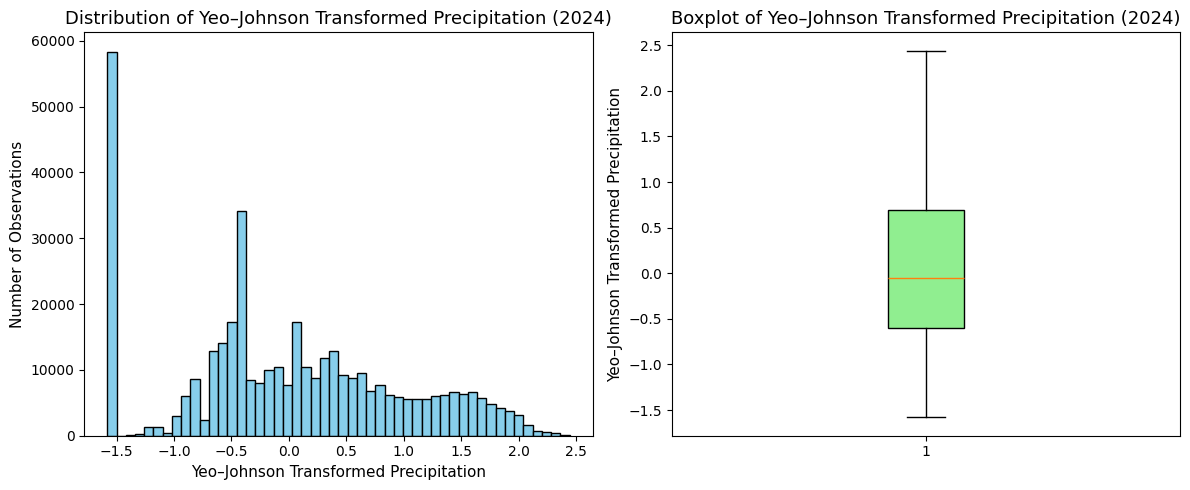

In [54]:

plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(climate_df["precip_yj"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Yeo–Johnson Transformed Precipitation (2024)", fontsize=13)
plt.xlabel("Yeo–Johnson Transformed Precipitation", fontsize=11)
plt.ylabel("Number of Observations", fontsize=11)

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(climate_df["precip_yj"], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"))
plt.title("Boxplot of Yeo–Johnson Transformed Precipitation (2024)", fontsize=13)
plt.ylabel("Yeo–Johnson Transformed Precipitation", fontsize=11)

plt.tight_layout()
plt.show()



### preprocessing temperature (max and min) 


In [62]:
print("tmax skeweness:",climate_df["tmax"].skew())
print("tmin skeweness:",climate_df["tmin"].skew())

tmax skeweness: -0.16157691
tmin skeweness: -0.053523384


apply the Equal-depth (frequency) partitioning

This gives you 4 intervals based on percentiles (25%, 50%, 75%, 100%).

Equal-Depth (Equal-Frequency) Partitioning Smoothing

To reduce noise and small fluctuations in temperature values, equal-frequency binning was applied to tmax and tmin.
The data were divided into bins such that each bin contains approximately the same number of observations.
Each temperature value was then replaced by the midpoint (or mean) of its bin boundaries.

This smoothing technique preserves the overall data structure while reducing the influence of outliers and local variability.
It is useful for making the variable more stable and representative for subsequent analysis or visualization

In [71]:
# Compute quantile bins (edges)
_, bin_edges_max = pd.qcut(climate_df["tmax"], q=4, retbins=True, duplicates="drop")

print("Equal-frequency bin edges:", bin_edges_max)

Equal-frequency bin edges: [ 5.25 24.25 32.   38.25 48.  ]


In [72]:
_, bin_edges_min = pd.qcut(climate_df["tmin"], q=4, retbins=True, duplicates="drop")

print("Equal-frequency bin edges:", bin_edges_min)

Equal-frequency bin edges: [-2.25 10.   17.   24.   32.  ]


In [73]:
# Smooth by nearest bin boundary
def smooth_by_boundary(x, bins):
    for i in range(1, len(bins)):
        if bins[i-1] <= x <= bins[i]:
            # Replace with the midpoint of the bin
            return (bins[i-1] + bins[i]) / 2
    return x

climate_df["tmax_smoothed"] = climate_df["tmax"].apply(lambda x: smooth_by_boundary(x, bin_edges_max))
climate_df["tmin_smoothed"]=climate_df["tmin"].apply(lambda x: smooth_by_boundary(x, bin_edges_min))

In [76]:
climate_df["tmax_smoothed"].unique()

array([14.75 , 28.125, 35.125, 43.125])

In [77]:
climate_df["tmin_smoothed"].unique()

array([ 3.875, 13.5  , 20.5  , 28.   ])

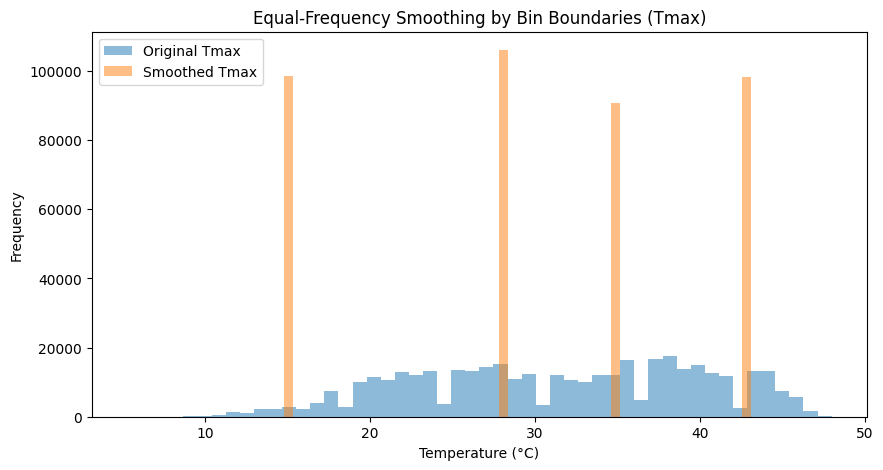

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(climate_df["tmax"], bins=50, alpha=0.5, label="Original Tmax")
plt.hist(climate_df["tmax_smoothed"], bins=50, alpha=0.5, label="Smoothed Tmax")
plt.title("Equal-Frequency Smoothing by Bin Boundaries (Tmax)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


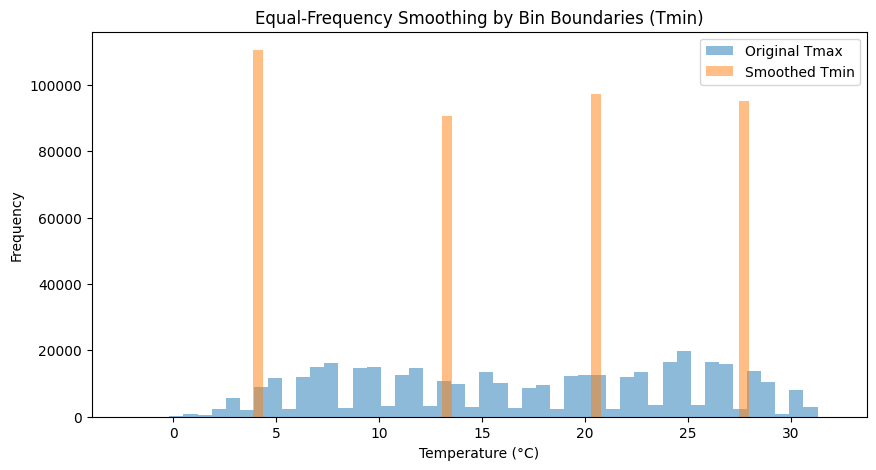

In [79]:

plt.figure(figsize=(10,5))
plt.hist(climate_df["tmin"], bins=50, alpha=0.5, label="Original Tmax")
plt.hist(climate_df["tmin_smoothed"], bins=50, alpha=0.5, label="Smoothed Tmin")
plt.title("Equal-Frequency Smoothing by Bin Boundaries (Tmin)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

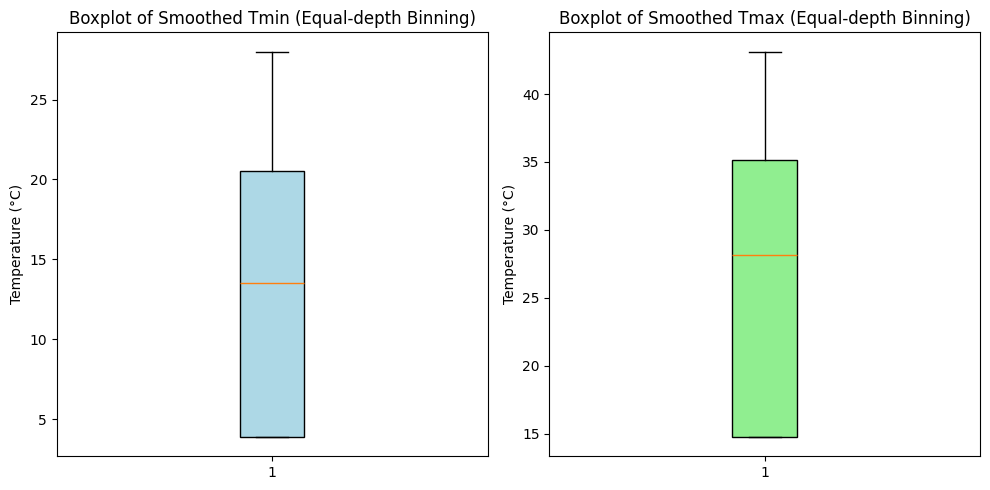

In [83]:
# Plot boxplots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(climate_df["tmin_smoothed"], patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Smoothed Tmin (Equal-depth Binning)")
plt.ylabel("Temperature (°C)")

plt.subplot(1,2,2)
plt.boxplot(climate_df["tmax_smoothed"], patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Smoothed Tmax (Equal-depth Binning)")
plt.ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()

In [80]:
# Create equal-frequency bins
climate_df["tmin_bin"] = pd.qcut(climate_df["tmin"], q=4, labels=["Very Cold", "Cold", "Warm", "Hot"])
climate_df["tmax_bin"] = pd.qcut(climate_df["tmax"], q=4, labels=["Cool", "Mild", "Hot", "Very Hot"])

# Check the bin distribution
print(climate_df["tmin_bin"].value_counts())
print(climate_df["tmax_bin"].value_counts())

tmin_bin
Very Cold    110523
Warm          97366
Hot           95036
Cold          90567
Name: count, dtype: int64
tmax_bin
Mild        106069
Cool         98537
Very Hot     98275
Hot          90611
Name: count, dtype: int64


In [81]:
climate_df.head()

,longitude,latitude,date,prec,tmax,tmin,precip_log,precip_yj,tmin_bin,tmax_bin,tmax_smoothed,tmin_smoothed
0,-8.625,27.291667,2024-01-01,2.000,22.00,8.00,1.098612,0.072962,Very Cold,Cool,14.750,3.875
1,-8.625,27.291667,2024-02-01,0.425,25.00,11.00,0.354172,-0.961386,Cold,Mild,28.125,13.500
2,-8.625,27.291667,2024-03-01,0.500,27.00,13.00,0.405465,-0.879155,Cold,Mild,28.125,13.500
3,-8.625,27.291667,2024-04-01,1.500,32.00,18.00,0.916291,-0.150974,Warm,Mild,28.125,20.500
4,-8.625,27.291667,2024-05-01,0.000,33.25,19.25,0.000000,-1.580815,Warm,Hot,35.125,20.500


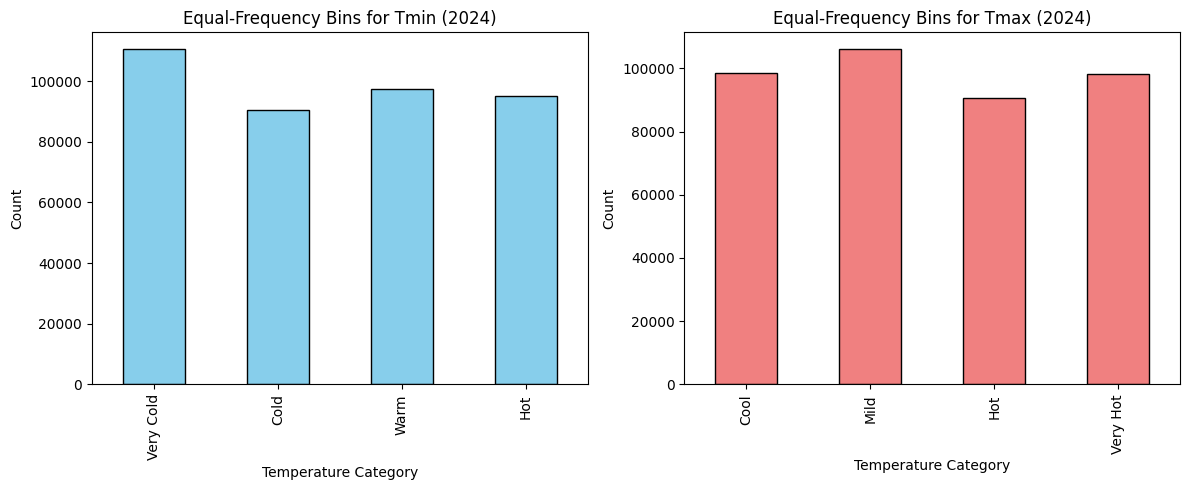

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Tmin bins
plt.subplot(1, 2, 1)
climate_df["tmin_bin"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Equal-Frequency Bins for Tmin (2024)")
plt.xlabel("Temperature Category")
plt.ylabel("Count")

# Tmax bins
plt.subplot(1, 2, 2)
climate_df["tmax_bin"].value_counts().sort_index().plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Equal-Frequency Bins for Tmax (2024)")
plt.xlabel("Temperature Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [67]:
bins = pd.qcut(climate_df["tmax"], q=4)
print(bins)

0         (5.249, 24.25]
1          (24.25, 32.0]
2          (24.25, 32.0]
3          (24.25, 32.0]
4          (32.0, 38.25]
               ...      
393487     (32.0, 38.25]
393488     (32.0, 38.25]
393489     (24.25, 32.0]
393490    (5.249, 24.25]
393491    (5.249, 24.25]
Name: tmax, Length: 393492, dtype: category
Categories (4, interval[float64, right]): [(5.249, 24.25] < (24.25, 32.0] < (32.0, 38.25] < (38.25, 48.0]]
